############################################################################################

################## -- Programa de Especialización en Data Science Nivel II --##########################

############################################################################################

Modelos de Clasificación : Modelos de Boosting - Adaboost - GBM

Autores : José Cárdenas - André Chávez 

## Guía de Modelamiento de Información

#### 1 LIBRERÍAS A UTILIZAR

In [95]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [96]:
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science - URP/DataSet/Aprendizaje Supervisado/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [97]:
#Leer los primeros registros.
train.head(10) # Puedes visualizar la cantidad de registro que requieras

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [98]:
# Podemos ver la estructura de los datos
print('Estructura de los datos') 
[(col, type(train[col][0])) for col in train.columns] 

Estructura de los datos


[('Loan_ID', str),
 ('Gender', str),
 ('Married', str),
 ('Dependents', str),
 ('Education', str),
 ('Self_Employed', str),
 ('ApplicantIncome', numpy.int64),
 ('CoapplicantIncome', numpy.float64),
 ('LoanAmount', numpy.float64),
 ('Loan_Amount_Term', numpy.float64),
 ('Credit_History', numpy.float64),
 ('Property_Area', str),
 ('Loan_Status', str)]

#### 3 EXPLORACION DE LA DATA

#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [99]:
train.describe() #Resumen de la información

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

#### Aquí hay algunas conclusiones

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [100]:
# Tabla Resumen
train.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002862,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [101]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

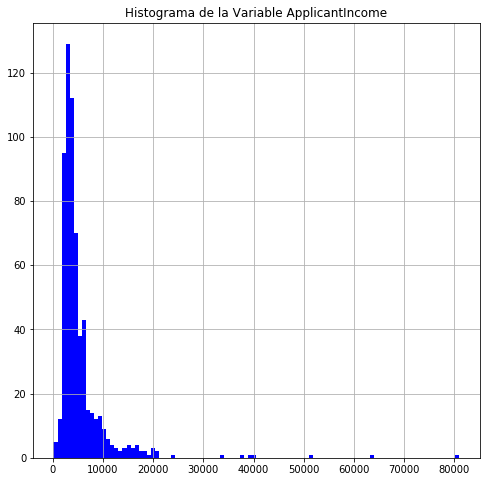

In [102]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable ApplicantIncome')
train['ApplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

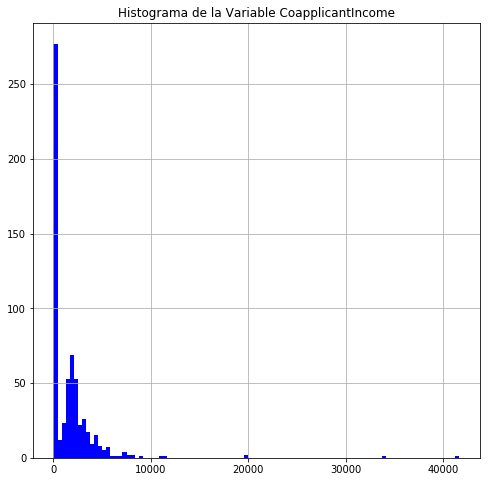

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
train['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

### Cuartiles y diagramas de cajas

Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



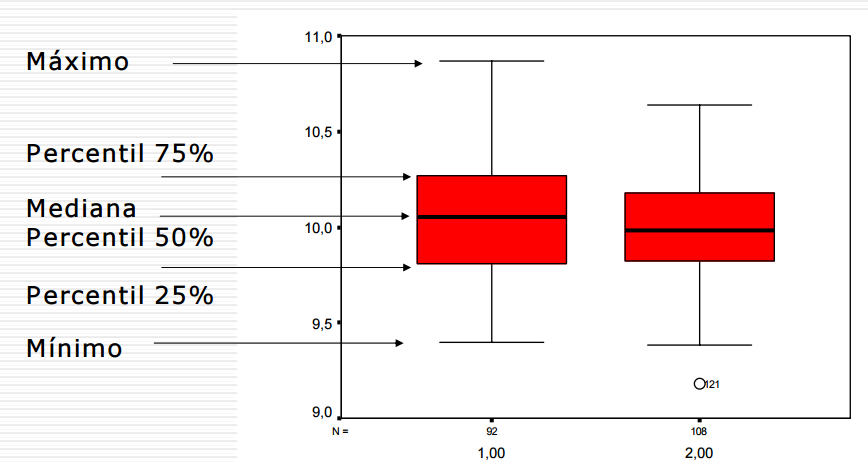

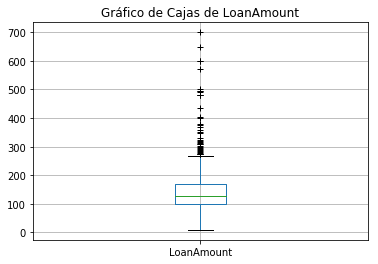

In [104]:
# Gráfico de Cajas
plt.title('Gráfico de Cajas de LoanAmount')
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


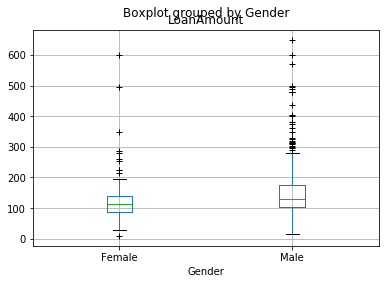

In [105]:
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5,by='Gender')

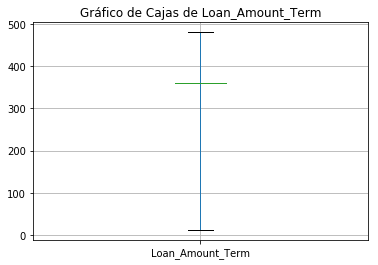

In [106]:
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de Loan_Amount_Term')
train.boxplot(column='Loan_Amount_Term',autorange='T',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

#### 4 IMPUTACION DE LA DATA

In [111]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [112]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [113]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") # Leer el dataset en un dataframe usando pandas
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [114]:
# Revisamos si la recodigicación fue la idónea
train.describe(include='all') 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP002862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.813644,1.651391,1.762938,1.218241,1.140893,5403.459283,1621.245798,146.412162,342.00000,1.842199,2.037459,0.687296
std,NaN,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.00000,1.000000,1.000000,0.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,2.000000,1.000000,0.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.000000,2.000000,1.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.000000,3.000000,1.000000


In [115]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science - URP/DataSet/Aprendizaje Supervisado/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [117]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [118]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mean())    

In [119]:
train_parametrica.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.817590,1.653094,1.744300,1.218241,1.133550,5403.459283,1621.245798,146.412162,342.000000,1.855049,2.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,3.000000,1.000000
max,2.000000,2.000000,4.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,3.000000,1.000000


In [120]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [121]:
# Imputacion del Data Test
test_parametrica=test.copy()
test_parametrica.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3
2,LP001031,2.0,2,3.0,1,1.0,5000,1800,208.0,360.0,2.0,3
3,LP001035,2.0,2,3.0,1,1.0,2340,2546,100.0,360.0,NaN,3
4,LP001051,2.0,1,1.0,2,1.0,3276,0,78.0,360.0,2.0,3


In [122]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [123]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

In [124]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [128]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [129]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

#Creamos las variables para la validación o test


test_parametrica['TotalIncome'] = test_parametrica['ApplicantIncome'] + test_parametrica['CoapplicantIncome']
test_parametrica['LoanAmount_Log'] = round(np.log(test_parametrica['LoanAmount']),2)
test_parametrica['AmountxTerm']=round(test_parametrica['LoanAmount']/test_parametrica['Loan_Amount_Term'],2)


In [130]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
train_parametrica.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,146.412162,360.0,2.0,3,1,5849.0,4.99,0.41
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.000000,360.0,2.0,1,0,6091.0,4.85,0.36
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.000000,360.0,2.0,3,1,3000.0,4.19,0.18
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.000000,360.0,2.0,3,1,4941.0,4.79,0.33
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.000000,360.0,2.0,3,1,6000.0,4.95,0.39
5,LP001011,2.0,2.0,3.0,1,2.0,5417,4196.0,267.000000,360.0,2.0,3,1,9613.0,5.59,0.74
6,LP001013,2.0,2.0,1.0,2,1.0,2333,1516.0,95.000000,360.0,2.0,3,1,3849.0,4.55,0.26
7,LP001014,2.0,2.0,4.0,1,1.0,3036,2504.0,158.000000,360.0,1.0,2,0,5540.0,5.06,0.44
8,LP001018,2.0,2.0,3.0,1,1.0,4006,1526.0,168.000000,360.0,2.0,3,1,5532.0,5.12,0.47
9,LP001020,2.0,2.0,2.0,1,1.0,12841,10968.0,349.000000,360.0,2.0,2,0,23809.0,5.86,0.97


In [135]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [137]:
# Partición Muestral de la Información
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), 
                                                    train_parametrica['Loan_Status'], test_size=0.30,
                                                    stratify=train_parametrica['Loan_Status'],
                                                   random_state=100)

In [138]:
# Concatenamos las covariables y la variable dependiente del train para poder balancearlo
train_Xy = pd.concat([X_train, y_train], axis=1)

In [139]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_Xy.Loan_Status.value_counts()

1    295
0    134
Name: Loan_Status, dtype: int64

#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



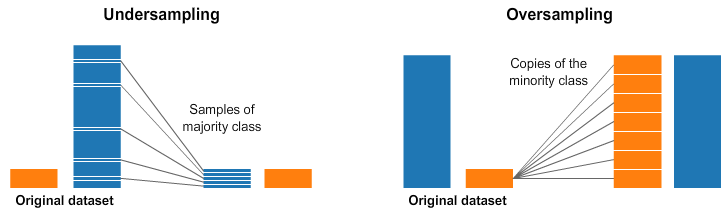

In [140]:
train_Xy.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,ApplicantIncome_Recod,Loan_Status
544,1.0,2.0,1.0,2,1.0,3017,663.0,102.0,360.0,2.0,2,3680.0,4.62,0.28,2,1
13,2.0,1.0,1.0,1,1.0,1853,2840.0,114.0,360.0,2.0,1,4693.0,4.74,0.32,1,0
383,2.0,1.0,1.0,1,2.0,7167,0.0,128.0,360.0,2.0,3,7167.0,4.85,0.36,2,1


Clase 0: 134
Clase 1: 295
Proportion Clase 0: 0.31 : 0
Proportion Clase 1: 0.69 : 1


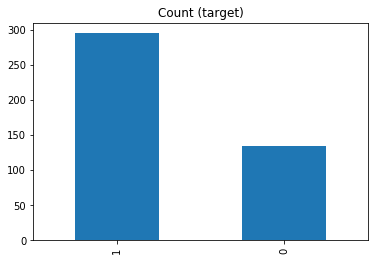

In [141]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_Xy.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');



In [142]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_Xy.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_Xy[train_Xy['Loan_Status'] == 0]
df_class_1 = train_Xy[train_Xy['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Undersampling o sub-muestreo

Random under-sampling:
1    134
0    134
Name: Loan_Status, dtype: int64


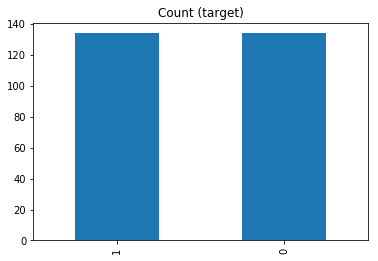

In [143]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de 
# elementos de la clase 0.
df_class_1_under = df_class_1.sample(count_class_0)
df_balanceado_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_balanceado_under.Loan_Status.value_counts())

df_balanceado_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

#### Oversampling o sobre-muestreo

Random over-sampling:
1    295
0    295
Name: Loan_Status, dtype: int64


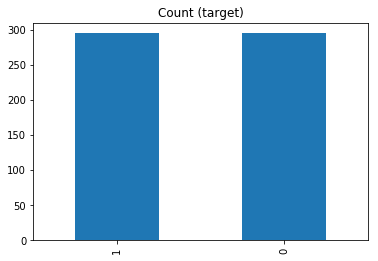

In [144]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');


### Métodos de Balanceo Sofisticados

#### RandomUnderSampling

In [152]:
# Creamos nuestra matriz de datos o variables independientes y 
# nuestro vector columna con la variable independiente
X, y = train_Xy.drop('Loan_Status', axis=1), train_Xy['Loan_Status']


In [153]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

df_X_rus = pd.DataFrame(data=X_rus,columns=X.columns)
df_y_rus = pd.DataFrame(data=y_rus,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_rus = pd.concat([df_X_rus, df_y_rus], axis=1)

In [156]:
#df_balanceado_rus.head(10)
#df_balanceado_rus.describe()
#df_balanceado_rus.Loan_Status.value_counts()

#### RandomOverSampling

In [157]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

df_X_ros = pd.DataFrame(data=X_ros,columns=X.columns)
df_y_ros = pd.DataFrame(data=y_ros,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_ros = pd.concat([df_X_ros, df_y_ros], axis=1)

In [60]:
#df_balanceado_ros.head(2)
#df_balanceado_ros.describe()
#df_balanceado_ros.Loan_Status.value_counts()

#### Imputación TomekLink

La imputación TomekLink son pares de instancias muy cercanas, pero de clases opuestas. Eliminar las instancias de la clase mayoritaria de cada par aumenta el espacio entre las dos clases, lo que facilita el proceso de clasificación.

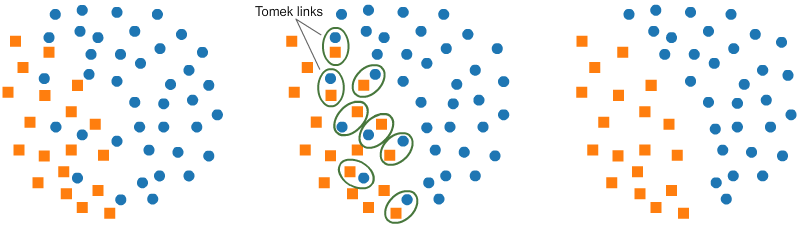

In [158]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl,id_tl  = tl.fit_sample(X, y)

df_X_tl = pd.DataFrame(data=X_tl,columns=X.columns)
df_y_tl = pd.DataFrame(data=y_tl,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

In [62]:
#df_balanceado_tl.head(3)
#df_balanceado_tl.describe()
#df_balanceado_tl.Loan_Status.value_counts()

### Imputación UnderSampling: Centros de Conglomerados

Esta técnica realiza submuestreo generando centroides basados en métodos de agrupamiento. Los datos se agruparán previamente por similitud, a fin de preservar la información.

En este ejemplo, pasaremos el dict {1: 192} para la relación de parámetros, para preservar 192 elementos de la clase mayoritaria (1) y todos los elementos de la clase minoritaria (0).

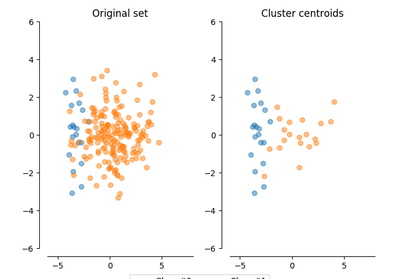

In [159]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 192})
X_cc, y_cc = cc.fit_sample(X, y)

df_X_cc = pd.DataFrame(data=X_cc,columns=X.columns)
df_y_cc = pd.DataFrame(data=y_cc,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_cc = pd.concat([df_X_cc, df_y_cc], axis=1)

In [65]:
#df_balanceado_cc.head(2)
#df_balanceado_cc.describe()
#df_balanceado_cc.Loan_Status.value_counts()

### Imputación OverSampling: SMOTE

SMOTE (Técnica de sobremuestreo de Minorías Sintéticas) consiste en la síntesis de elementos para la clase minoritaria, basados en los que ya existen. Funciona eligiendo al azar un punto de la clase minoritaria y calcula los k vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus vecinos.

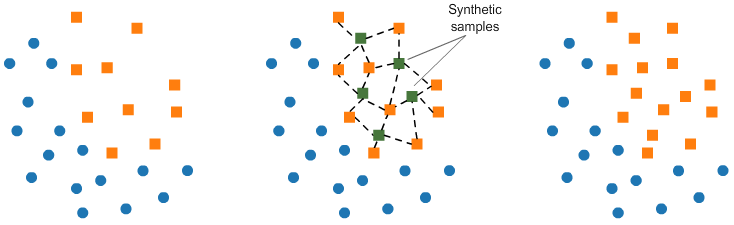

In [160]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

df_X_sm = pd.DataFrame(data=X_sm,columns=X.columns)
df_y_sm = pd.DataFrame(data=y_sm,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [68]:
#df_balanceado_sm.head(2)
#df_balanceado_sm.describe()
#df_balanceado_sm.Loan_Status.value_counts()

### Imputación Over-sampling seguido de under-sampling (SMOTE + Tomek links)

Ahora, haremos una combinación de sobremuestreo y submuestreo, usando las técnicas de enlaces SMOTE y Tomek:

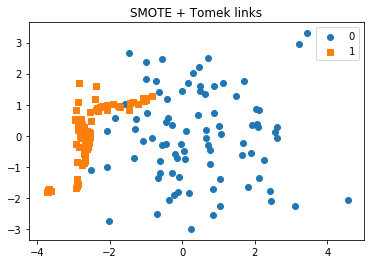

In [161]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

df_X_smt = pd.DataFrame(data=X_smt,columns=X.columns)
df_y_smt = pd.DataFrame(data=y_smt,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [70]:
#df_balanceado_smt.head(3)
#df_balanceado_smt.describe()
#df_balanceado_smt.Loan_Status.value_counts()


## Selección de Drivers

### Selección de Drivers Mediante Técnicas de Machine Learning

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

In [163]:
X_ros.shape

(590, 15)

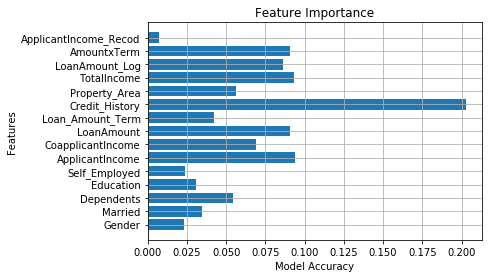

In [164]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X_ros, y_ros)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(15) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X.columns)
plt.grid(True)


Feature ranking:
1. feature 9 (0.203114)
2. feature 5 (0.097038)
3. feature 11 (0.095871)
4. feature 12 (0.088583)
5. feature 7 (0.087990)
6. feature 13 (0.084756)
7. feature 6 (0.076475)
8. feature 10 (0.063216)
9. feature 2 (0.053542)
10. feature 8 (0.036781)
11. feature 1 (0.027862)
12. feature 3 (0.026454)
13. feature 0 (0.025178)
14. feature 4 (0.023373)
15. feature 14 (0.009767)


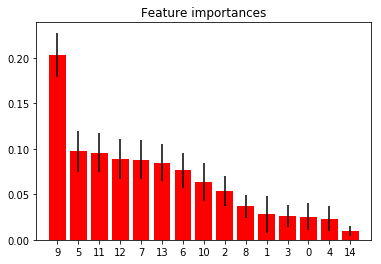

In [165]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_ros, y_ros)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_sm.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_ros.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_ros.shape[1]), indices)
plt.xlim([-1, X_ros.shape[1]])
plt.show()

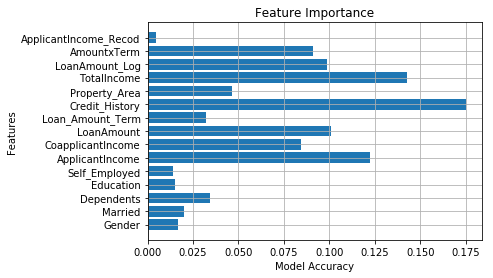

In [166]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC(n_jobs=2,n_estimators=50)
forest.fit(X_ros, y_ros)
importances = forest.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(15) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X.columns)
plt.grid(True)


#### 7 MODELADO DE LA DATA

In [167]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from matplotlib import pyplot as plt

In [168]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train =df_balanceado_ros.drop('Loan_Status',axis=1)
y_train = df_balanceado_ros['Loan_Status']

In [169]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(590, 15) (590,)
(185, 15) (185,)


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train) 

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = AdaBoost.predict(X_test)

In [ ]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
AdaBoost=AdaBoostClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(AdaBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

AdaBoost_roc_auc = roc_auc_score(y_test, AdaBoost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, AdaBoost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % AdaBoost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoost_ROC')
plt.show()

##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [ ]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [ ]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = AdaBoost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_AdaBoost.csv', index=False)

### GBM

In [ ]:
from sklearn import ensemble

params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.70,
          'learning_rate': 0.01, 'min_samples_leaf': 20, 'random_state': 3}
Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train) 

In [ ]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = Gboost.predict(X_test)

In [ ]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
Gboost = ensemble.GradientBoostingClassifier(**params)
scoring = 'accuracy'
results = model_selection.cross_val_score(Gboost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train)

Gboost_roc_auc = roc_auc_score(y_test, Gboost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Gboost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gboost (area = %0.2f)' % Gboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gboost_ROC')
plt.show()

In [ ]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [124]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = Gboost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_GBoost.csv', index=False)

## Grid Search o Tuning de Parámetros

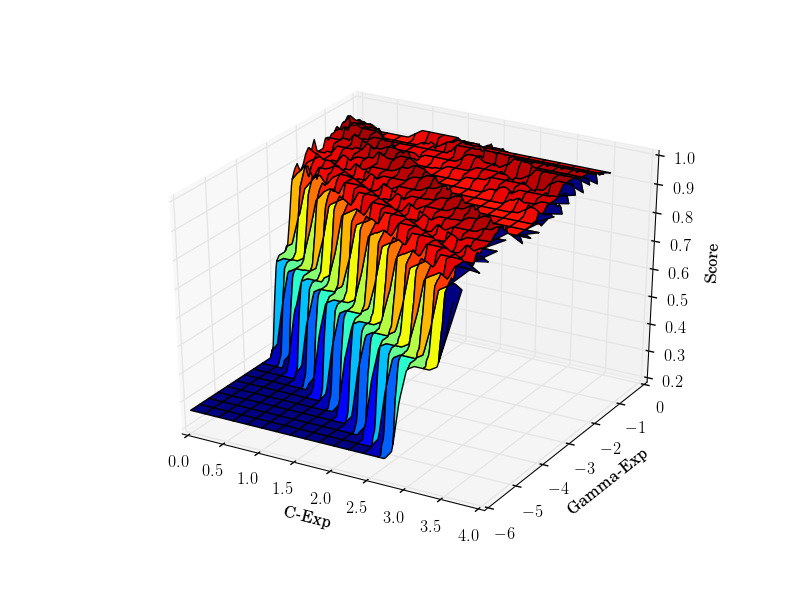

**Los parámtros del árbol se puede dividir en 3 categorías :**

1. Parámetros específicos del árbol: afectan a cada árbol individual en el modelo.
2. Parámetros de refuerzo: afectan la operación de refuerzo en el modelo.
3. Parámetros misceláneos: otros parámetros para el funcionamiento general.

#### Parámetros del Arbol

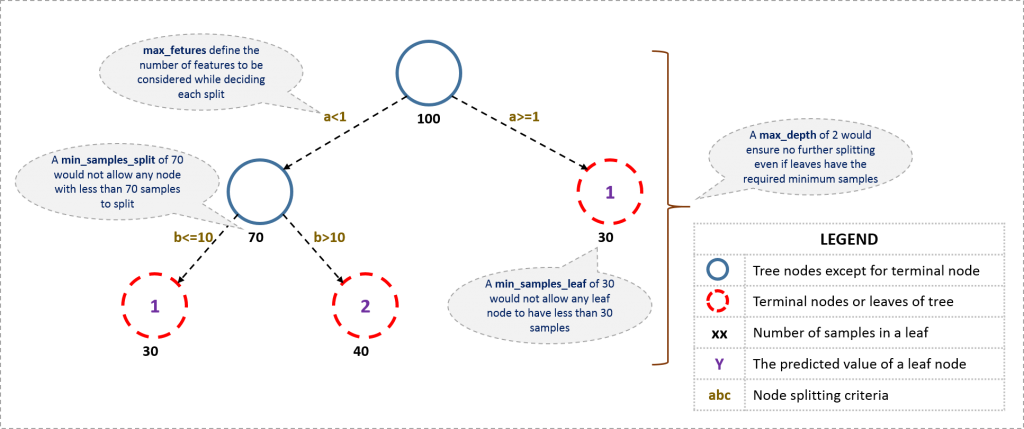

In [ ]:
# min_samples_split : Define el número mínimo de observaciones que se requieren en un nodo para ser consideradas 
# para la división.
# min_samples_leaf : Define el número mínimo de observaciones en hoja terminal.Por lo general, se deben elegir valores más 
# bajos para los problemas de clase desequilibrados porque las regiones en las que la clase minoritaria será mayoritaria serán 
# muy pequeñas.
# max_depth : Máxima profundidad del árbol
# max_leaf_nodes : Máximo número de hojas terminales.
# max_features : La cantidad de características que se deben considerar al buscar una mejor división

#### Parámetros del Boosting

In [ ]:
# learning_rate : Los valores más bajos son generalmente preferidos ya que hacen que el modelo sea robusto para las 
# características específicas del árbol y, por lo tanto, permite que se generalice bien.
# Los valores más bajos requerirían una mayor cantidad de árboles para modelar todas las relaciones y serán computacionalmente 
# costosos.
# n_estimadores : La cantidad de árboles que uno usará en el modelamiento.
# submuestra : La fracción de observaciones que se seleccionará para cada árbol.

#### Parámetros Misceláneos

In [ ]:
# loss : Se refiere a la función de pérdida que debe minimizarse en cada división. El predeterminado funciona bien.
# random_state : Semilla aleatoria.
# verbose : El tipo de salida que se imprimirá cuando el modelo termine de ajustarse.


In [169]:
#Importar librerías:

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [170]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    # Ajustamos el algoritmo sobre la data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_test)
    dtrain_predprob = alg.predict_proba(X_test)[:,1]
    
    #Rendimiento por cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,X_test, y_test, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8543
AUC Score (Train): 0.873931
CV Score : Mean - 0.8197492 | Std - 0.07573269 | Min - 0.6801948 | Max - 0.8875562


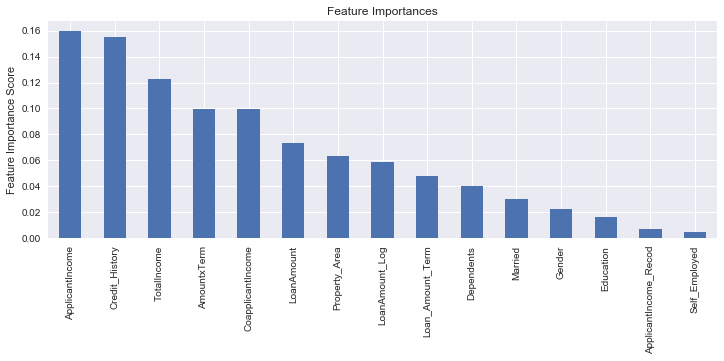

In [171]:
# Podemos comenzar construyendo un predictor Base, sobre el cual se puede ir mejorando
predictors = [x for x in X_train.columns]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, predictors)

In [172]:
# Elegir todos los predictores o algunos de ellos , primero tuneamos la cantidad de árboles
predictors = [x for x in train.columns]
param_test1 = {'n_estimators':list(range(100,1000,50))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [173]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88949, std: 0.01574, params: {'n_estimators': 100},
  mean: 0.89628, std: 0.01896, params: {'n_estimators': 150},
  mean: 0.90058, std: 0.01930, params: {'n_estimators': 200},
  mean: 0.89974, std: 0.02034, params: {'n_estimators': 250},
  mean: 0.89738, std: 0.02272, params: {'n_estimators': 300},
  mean: 0.89554, std: 0.02499, params: {'n_estimators': 350},
  mean: 0.89349, std: 0.02753, params: {'n_estimators': 400},
  mean: 0.89326, std: 0.02596, params: {'n_estimators': 450},
  mean: 0.89194, std: 0.02507, params: {'n_estimators': 500},
  mean: 0.88957, std: 0.02571, params: {'n_estimators': 550},
  mean: 0.88900, std: 0.02694, params: {'n_estimators': 600},
  mean: 0.88785, std: 0.02674, params: {'n_estimators': 650},
  mean: 0.88738, std: 0.02643, params: {'n_estimators': 700},
  mean: 0.88543, std: 0.02872, params: {'n_estimators': 750},
  mean: 0.88427, std: 0.03017, params: {'n_estimators': 800},
  mean: 0.88491, std: 0.03013, params: {'n_estimators': 850},
  mean: 

In [174]:
# Después tuneamos la máxima profundidad y mínimo número de elementos para partir un nodo padre
param_test2 = {'max_depth':list(range(1,4,1)), 'min_samples_split':list(range(25,100,5))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 25},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 30},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 35},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 40},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 45},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 50},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 55},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 60},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 65},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 70},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 75},
  mean: 0.88427, std: 0.01069, params: {'max_depth': 1, 'min_samples_split': 80},
  mean: 0.88427,

In [175]:
# Después tuneamos el mínimo número de elementos para partir un nodo padre y la cantidad de elementos en un nodo hijo
param_test3 = {'min_samples_split':list(range(35,45,1)), 'min_samples_leaf':list(range(5,20,1))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=250,max_depth=2,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.89649, std: 0.01752, params: {'min_samples_leaf': 5, 'min_samples_split': 35},
  mean: 0.89493, std: 0.01683, params: {'min_samples_leaf': 5, 'min_samples_split': 36},
  mean: 0.89582, std: 0.01694, params: {'min_samples_leaf': 5, 'min_samples_split': 37},
  mean: 0.89686, std: 0.01657, params: {'min_samples_leaf': 5, 'min_samples_split': 38},
  mean: 0.89784, std: 0.01735, params: {'min_samples_leaf': 5, 'min_samples_split': 39},
  mean: 0.89703, std: 0.01679, params: {'min_samples_leaf': 5, 'min_samples_split': 40},
  mean: 0.89683, std: 0.01769, params: {'min_samples_leaf': 5, 'min_samples_split': 41},
  mean: 0.89646, std: 0.01620, params: {'min_samples_leaf': 5, 'min_samples_split': 42},
  mean: 0.89781, std: 0.01767, params: {'min_samples_leaf': 5, 'min_samples_split': 43},
  mean: 0.89787, std: 0.01716, params: {'min_samples_leaf': 5, 'min_samples_split': 44},
  mean: 0.89778, std: 0.01883, params: {'min_samples_leaf': 6, 'min_samples_split': 35},
  mean: 0.89813, std:

In [182]:
gbm03

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=19, min_samples_split=41,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


Model Report
Accuracy : 0.8386
AUC Score (Train): 0.871227
CV Score : Mean - 0.8264472 | Std - 0.05351874 | Min - 0.724026 | Max - 0.8770615


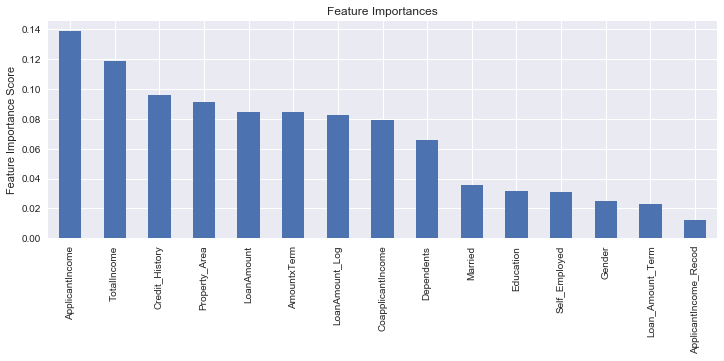

In [183]:
predictors = [x for x in X_train.columns]
modelfit(gbm03, X_train, predictors)

In [184]:
# Después tuneamos el número máximo de variables o features
param_test4 = {'max_features':list(range(2,15,1))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=250,max_depth=3, min_samples_split=39, min_samples_leaf=19, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.90374, std: 0.01191, params: {'max_features': 2},
  mean: 0.90294, std: 0.01402, params: {'max_features': 3},
  mean: 0.89965, std: 0.01704, params: {'max_features': 4},
  mean: 0.89908, std: 0.01752, params: {'max_features': 5},
  mean: 0.89470, std: 0.01785, params: {'max_features': 6},
  mean: 0.89603, std: 0.01971, params: {'max_features': 7},
  mean: 0.89493, std: 0.01795, params: {'max_features': 8},
  mean: 0.89487, std: 0.01688, params: {'max_features': 9},
  mean: 0.89605, std: 0.01670, params: {'max_features': 10},
  mean: 0.89286, std: 0.01575, params: {'max_features': 11},
  mean: 0.89389, std: 0.01601, params: {'max_features': 12},
  mean: 0.89430, std: 0.01746, params: {'max_features': 13},
  mean: 0.89147, std: 0.02056, params: {'max_features': 14}],
 {'max_features': 2},
 0.9037442396313364)

In [185]:
# Por último tuneamos el % de muestra por árbol
param_test5 = {'subsample':[0.3,0.4,0.5,0.6,0.7,0.75]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=250,max_depth=3,min_samples_split=39, min_samples_leaf=19, random_state=10,max_features=2),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.90040, std: 0.00811, params: {'subsample': 0.3},
  mean: 0.90346, std: 0.00973, params: {'subsample': 0.4},
  mean: 0.90063, std: 0.00635, params: {'subsample': 0.5},
  mean: 0.90052, std: 0.00884, params: {'subsample': 0.6},
  mean: 0.89891, std: 0.01674, params: {'subsample': 0.7},
  mean: 0.90236, std: 0.01250, params: {'subsample': 0.75}],
 {'subsample': 0.4},
 0.9034562211981567)

In [126]:
from sklearn import ensemble

params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.40, 'max_features': 2,
          'learning_rate': 0.1, 'min_samples_leaf': 19,'min_samples_split': 39, 'random_state': 3}
Gboost_T = ensemble.GradientBoostingClassifier(**params)
Gboost_T.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=19, min_samples_split=39,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=3, subsample=0.4, verbose=0,
              warm_start=False)

In [127]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.40, 'max_features': 2,
          'learning_rate': 0.1, 'min_samples_leaf': 19,'min_samples_split': 41, 'random_state': 3}
Gboost = ensemble.GradientBoostingClassifier(**params)
scoring = 'accuracy'
results = model_selection.cross_val_score(Gboost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.825


In [128]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                                     'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome',
                                     'LoanAmount_Log','AmountxTerm','ApplicantIncome_Recod']]

In [129]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = Gboost_T.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_GBoost_T.csv', index=False)